In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(
        font_scale = 2,
        style = 'whitegrid',
        rc = {'figure.figsize' : (21,9)}
       )

In [3]:
Avocado_Board = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/avocado_mean.csv')

In [4]:
Avocado_Board

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [5]:
Avocado_Board.rolling(3).mean().round(2).max()

AveragePrice    1.85
dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


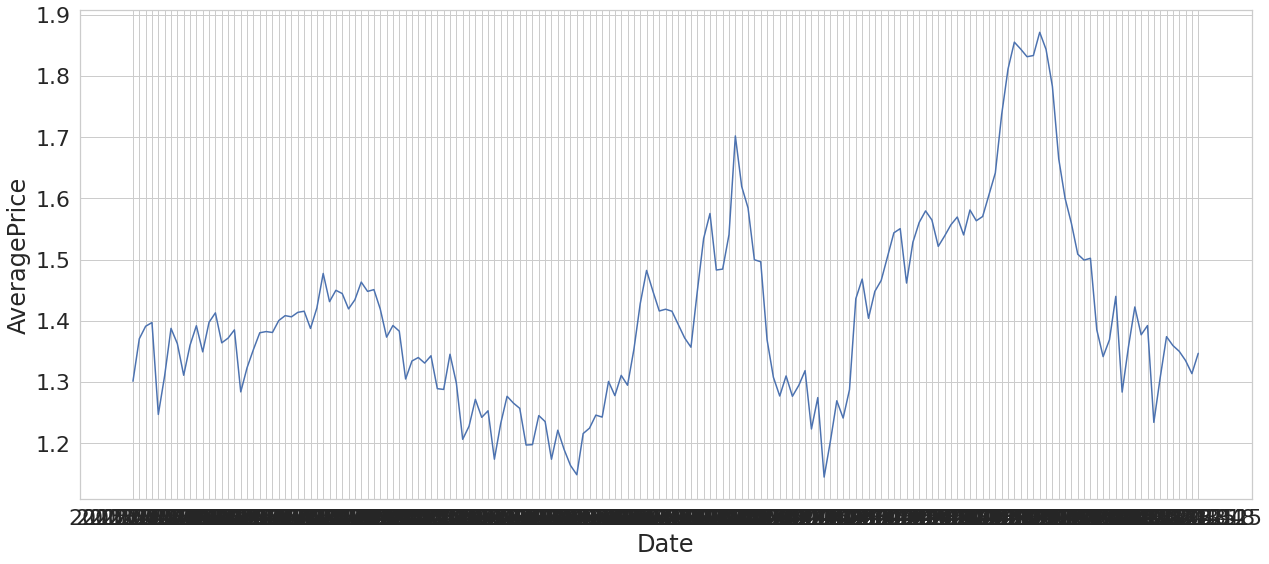

In [6]:
q3 = Avocado_Board.rolling(10).mean().round(2)
sns.lineplot(Avocado_Board.Date, Avocado_Board.AveragePrice)

In [7]:
avocado_ewm = Avocado_Board.AveragePrice.ewm(span=2).mean()

In [8]:
avocado_ewm

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [33]:
Avocado_Full = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/avocado_full.csv', index_col=0)

In [34]:
Avocado_Full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


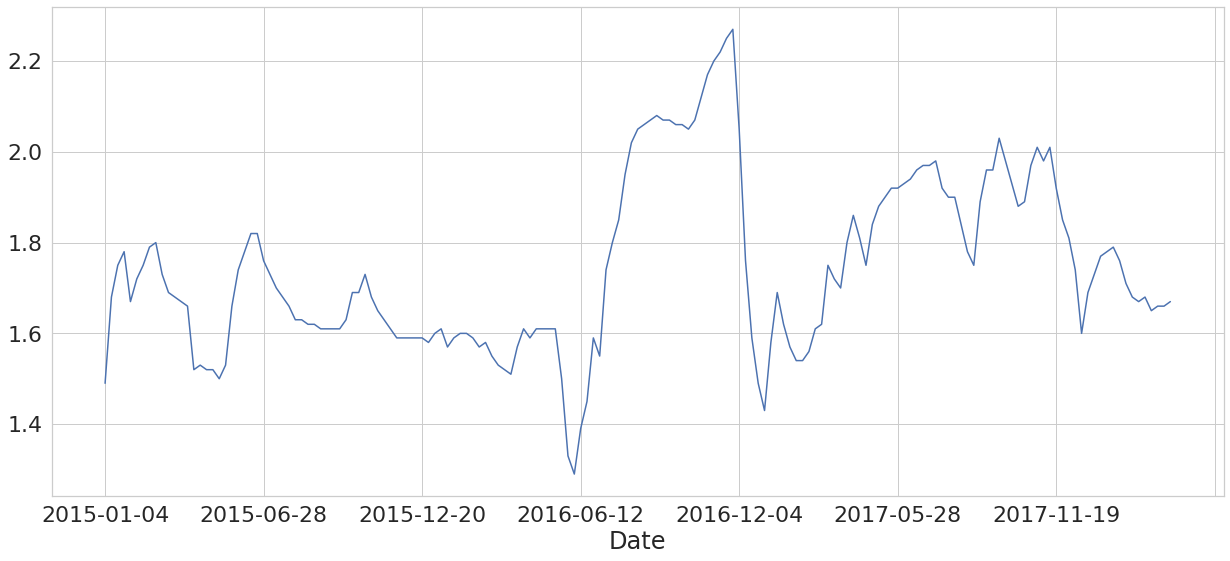

In [48]:
Avocado_Full.query('type == "organic" and region == "Chicago" ') \
.AveragePrice.ewm(span=4).mean().round(2) \
.plot()

In [76]:
delays = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/delays.csv')

In [77]:
delays

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [78]:
delays["delay"] = delays.delay.str.replace('-', '')
delays.delay = pd.to_timedelta(delays.delay)
delays

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


In [79]:
delays["delay_categorical"] = pd.cut(delays.delay, bins=3)

In [80]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [ ]:
delays["delay_categorical"] = delays